In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Problem Definition
# 2. Data Collection
# 3. Data Cleaning
# 4. Data Preprocessing
# 5. Exploratory Data Analysis (EDA)
# 6. Feature Engineering
# 7. Model Building
# 8. Model Evaluation

In [127]:
df=pd.read_csv(r"C:\Users\admin\Downloads\CO2 Emissions_Canada.csv")
import pandas as pd
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")

print(df)

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

In [128]:
print(df.shape)

(7385, 12)


In [129]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

# 1.Data Cleaning

In [130]:
#check null value
print(df.isnull().sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [131]:
#check duplcate
for col in df.columns:
    if df[col].duplicated().any():
        print(col)

Make
Model
Vehicle Class
Engine Size(L)
Cylinders
Transmission
Fuel Type
Fuel Consumption City (L/100 km)
Fuel Consumption Hwy (L/100 km)
Fuel Consumption Comb (L/100 km)
Fuel Consumption Comb (mpg)
CO2 Emissions(g/km)


### Check outlier

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Engine Size(L)'),
  Text(1, 0, 'Cylinders'),
  Text(2, 0, 'Fuel Consumption City (L/100 km)'),
  Text(3, 0, 'Fuel Consumption Hwy (L/100 km)'),
  Text(4, 0, 'Fuel Consumption Comb (L/100 km)'),
  Text(5, 0, 'Fuel Consumption Comb (mpg)'),
  Text(6, 0, 'CO2 Emissions(g/km)')])

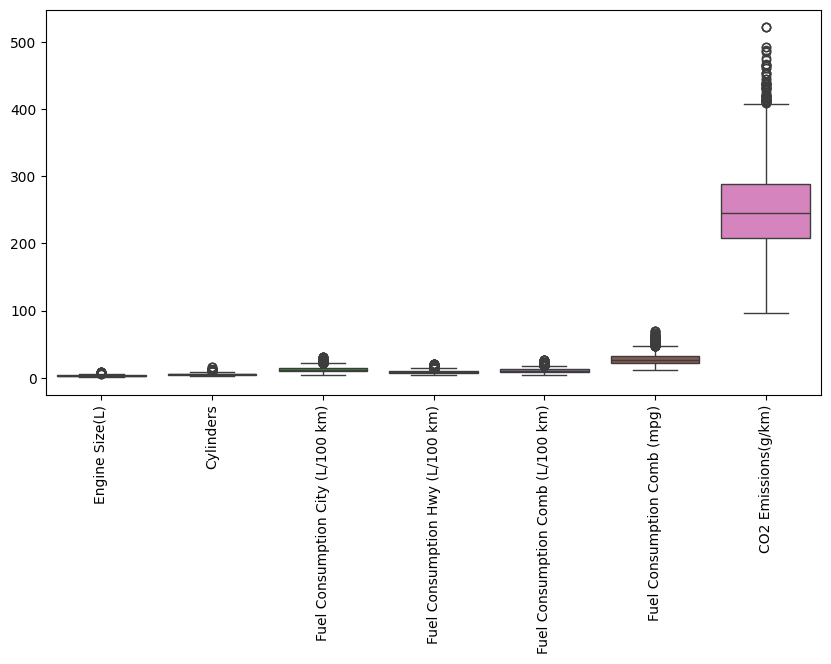

In [132]:
plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.xticks(rotation=90)

In [133]:
#IQR method to count outlier 
numeric=df.select_dtypes(include='number')
for col in numeric:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    outlier=df.loc[(df[col]>upper)|(df[col]<lower)]
    print(col)
    print("Outliers ",len(outlier))
    

Engine Size(L)
Outliers  137
Cylinders
Outliers  196
Fuel Consumption City (L/100 km)
Outliers  132
Fuel Consumption Hwy (L/100 km)
Outliers  208
Fuel Consumption Comb (L/100 km)
Outliers  142
Fuel Consumption Comb (mpg)
Outliers  114
CO2 Emissions(g/km)
Outliers  80


In [134]:
#replace the outlier
for col in numeric:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df.loc[df[col]>upper, col]=upper
    df.loc[df[col]<lower, col]=lower



([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Engine Size(L)'),
  Text(1, 0, 'Cylinders'),
  Text(2, 0, 'Fuel Consumption City (L/100 km)'),
  Text(3, 0, 'Fuel Consumption Hwy (L/100 km)'),
  Text(4, 0, 'Fuel Consumption Comb (L/100 km)'),
  Text(5, 0, 'Fuel Consumption Comb (mpg)'),
  Text(6, 0, 'CO2 Emissions(g/km)')])

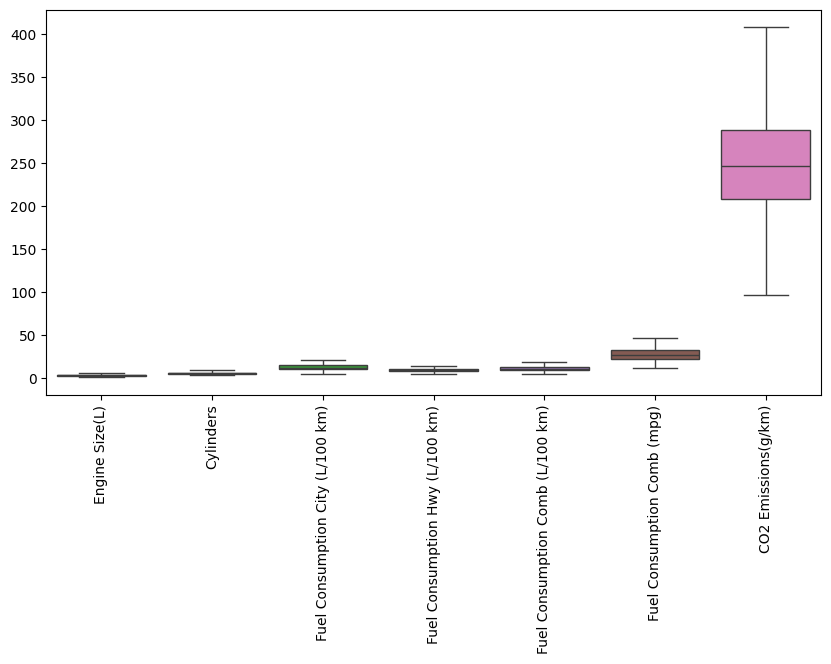

In [135]:
plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.xticks(rotation=90)

In [136]:
print(df.describe())
df

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.152844     5.545159                         12.518145   
std          1.335258     1.629445                          3.376879   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          6.250000     9.000000                         21.350000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          8.996994                         10.937360   
std                           2.081056                          2.770957   
min                           4.000000         

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,47,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


# 2.Exploratory Data Analysis

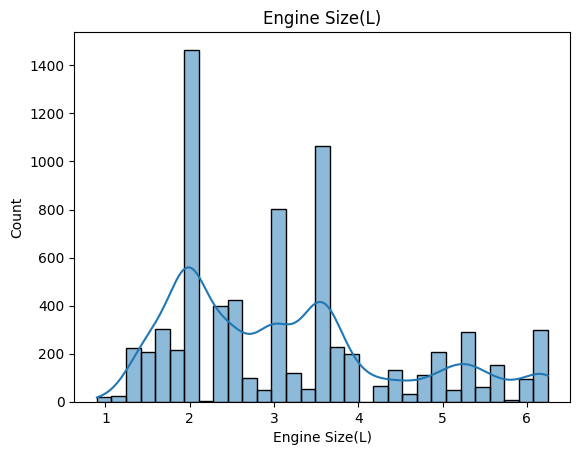

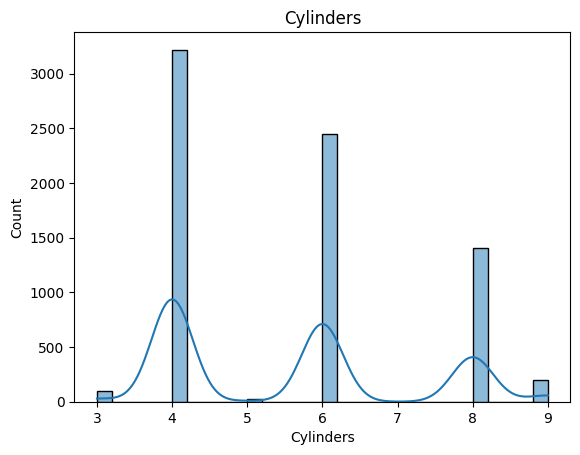

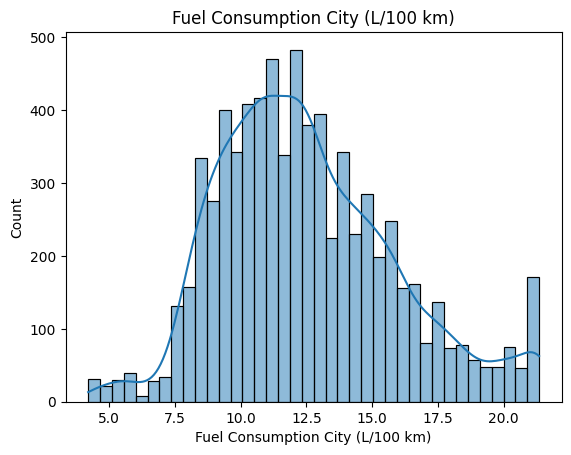

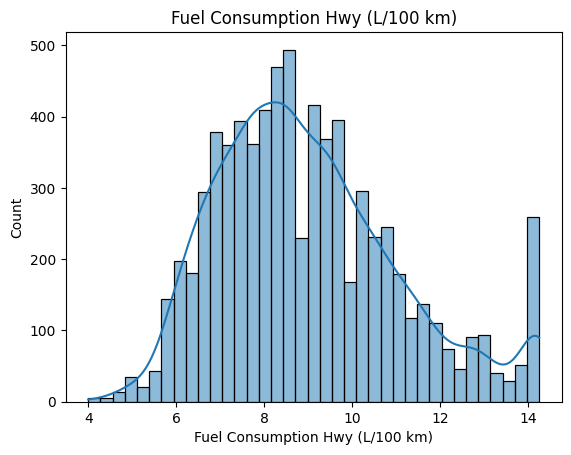

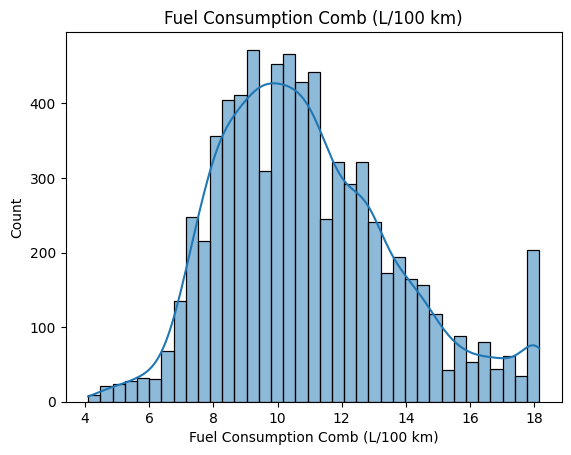

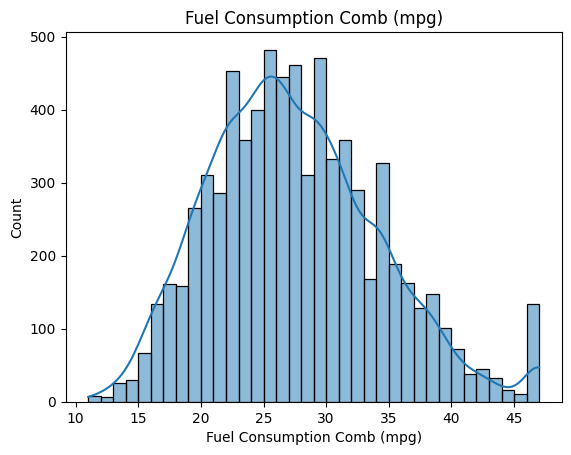

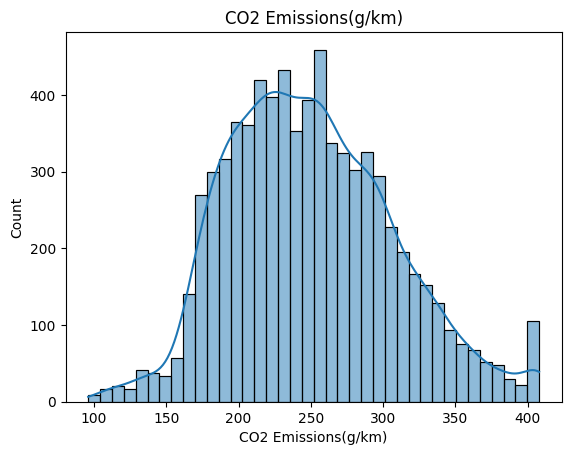

In [137]:
#sns.histplot(data=df,x='Fuel Consumption City (L/100 km)')
numeric=df.select_dtypes(include='number')
for col in numeric:
    sns.histplot(data=df, x=col,kde=True)
    plt.title(col)
    plt.show()


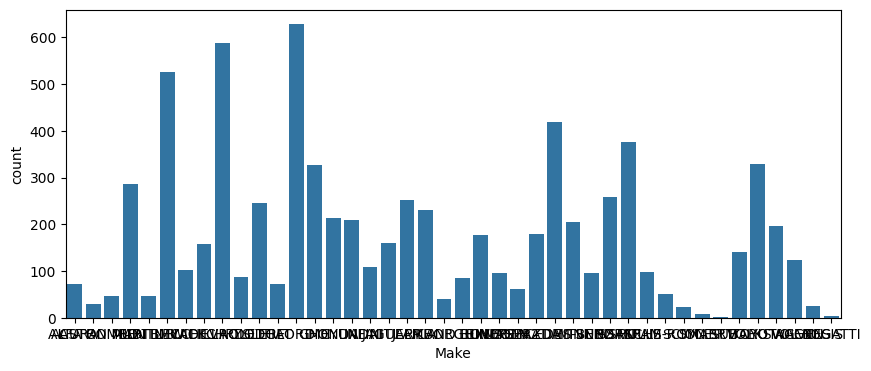

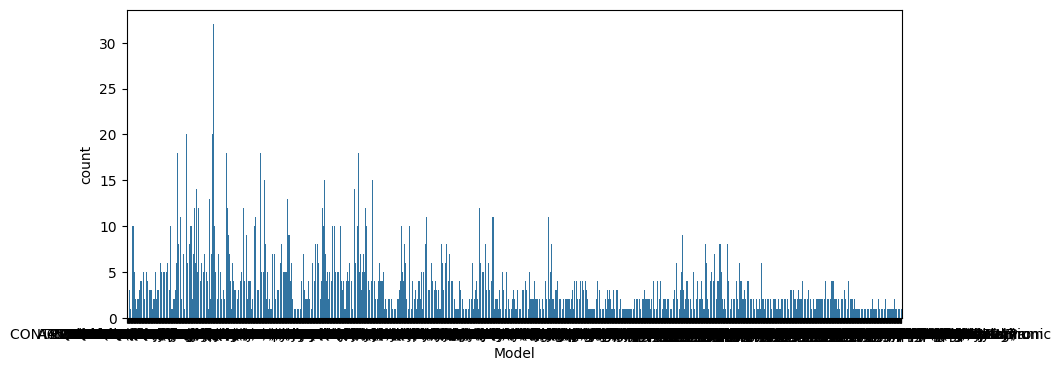

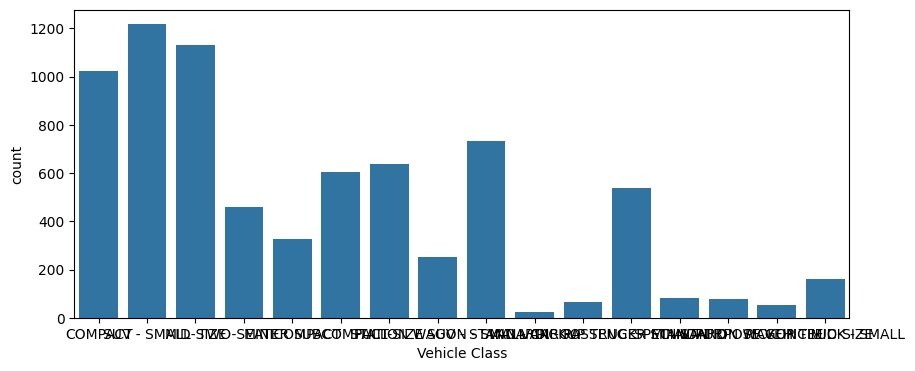

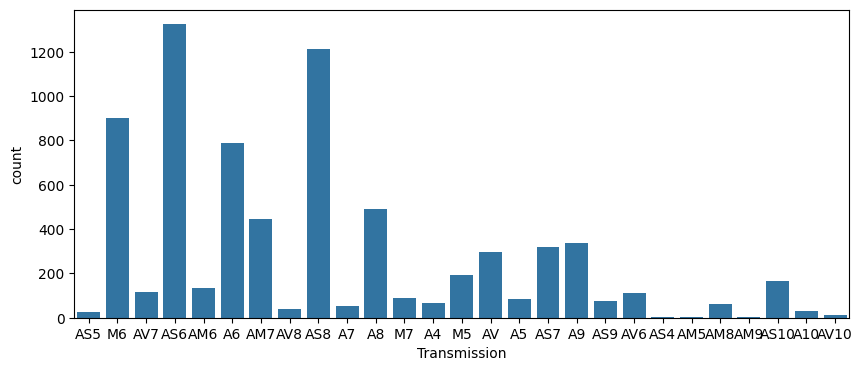

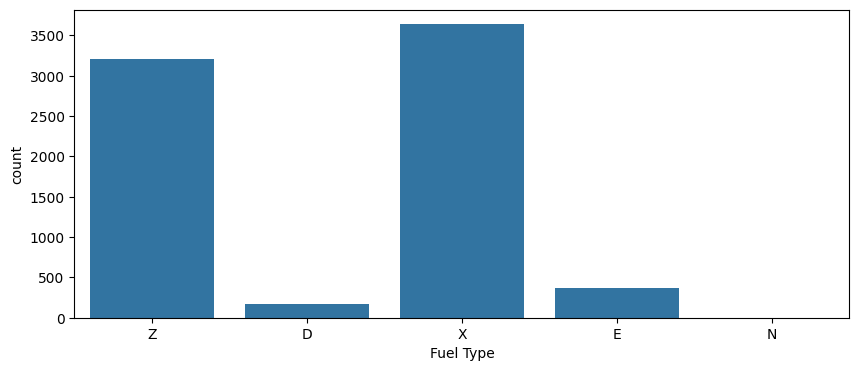

In [139]:
categorical_cols = df.select_dtypes(include="object")
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col)

    

<Axes: >

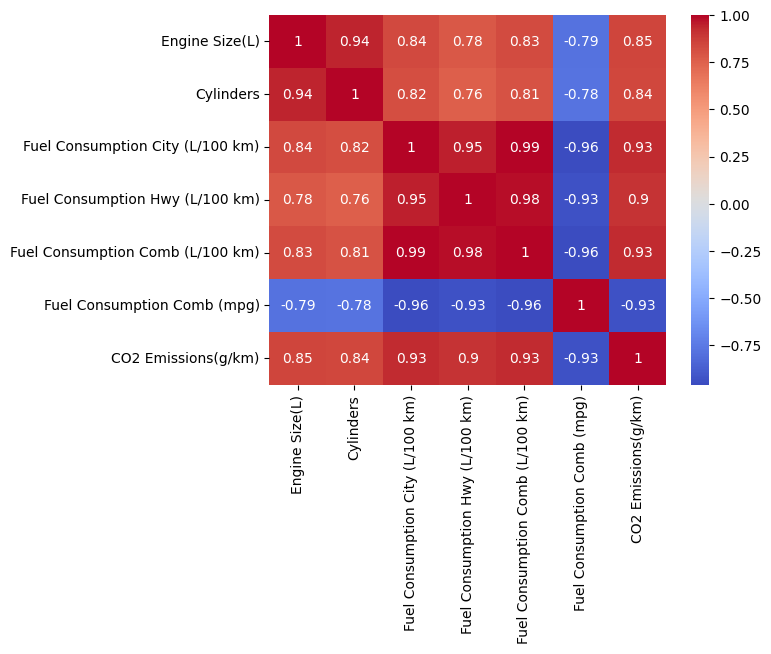

In [52]:
#correlation
corr=numeric.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [88]:
print(df)

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

Text(0.5, 1.0, 'Scatter plot of Engine Size(L) and Fuel Consumption City')

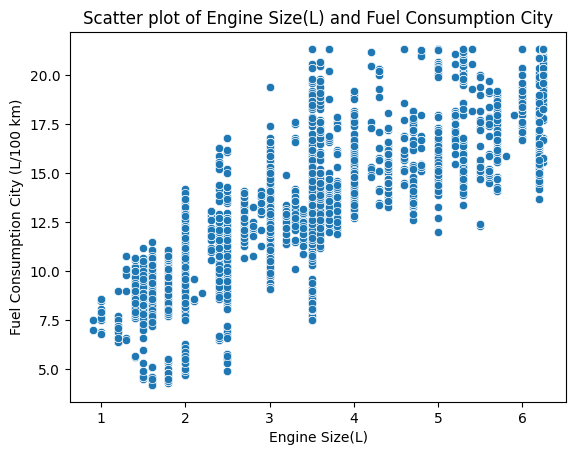

In [54]:
sns.scatterplot(x='Engine Size(L)',y='Fuel Consumption City (L/100 km)',data=df)
plt.title("Scatter plot of Engine Size(L) and Fuel Consumption City")

Text(0.5, 1.0, 'Scatter plot of Fuel Consumption City and Fuel Consumption Hwy')

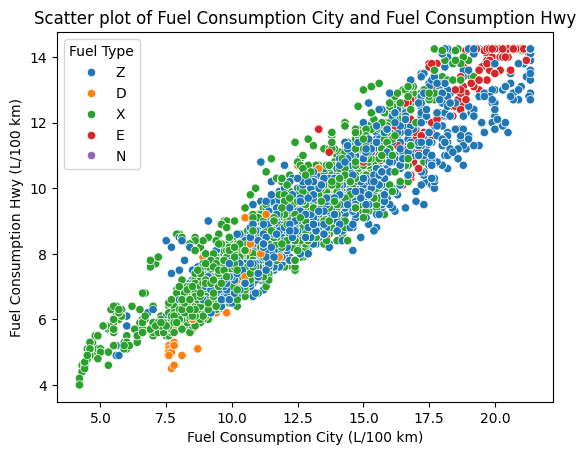

In [55]:
sns.scatterplot(x='Fuel Consumption City (L/100 km)',y='Fuel Consumption Hwy (L/100 km)',data=df,hue='Fuel Type')
plt.title("Scatter plot of Fuel Consumption City and Fuel Consumption Hwy")

Text(0.5, 1.0, 'Scatter plot of Fuel Consumption Comb and Fuel Consumption Hwy')

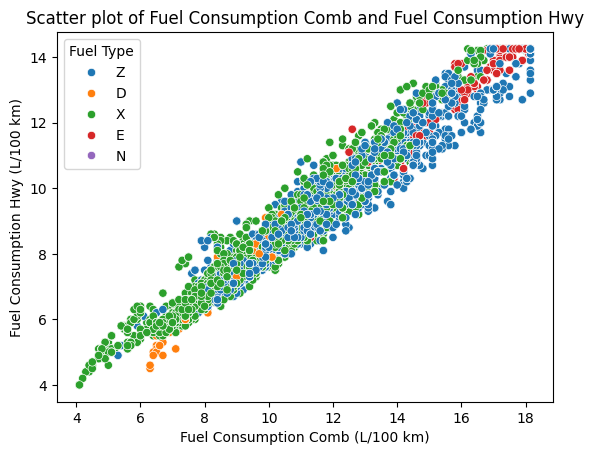

In [56]:
sns.scatterplot(x='Fuel Consumption Comb (L/100 km)',y='Fuel Consumption Hwy (L/100 km)',data=df,hue='Fuel Type')
plt.title("Scatter plot of Fuel Consumption Comb and Fuel Consumption Hwy")

Text(0.5, 1.0, 'Line plot of Fuel Consumption Comb and CO2 Emissions')

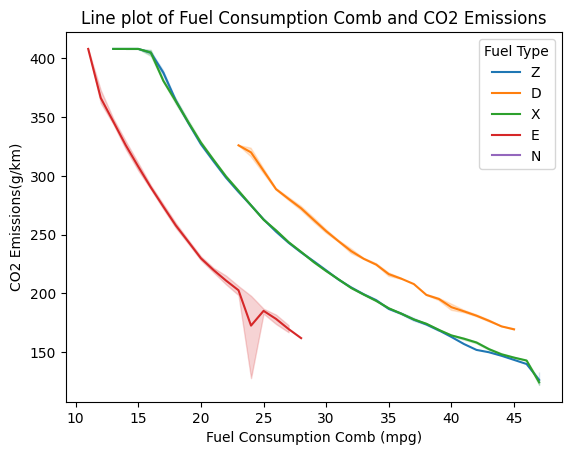

In [57]:
sns.lineplot(x='Fuel Consumption Comb (mpg)',y='CO2 Emissions(g/km)',data=df,hue='Fuel Type')
plt.title('Line plot of Fuel Consumption Comb and CO2 Emissions')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'AS5'),
  Text(1, 0, 'M6'),
  Text(2, 0, 'AV7'),
  Text(3, 0, 'AS6'),
  Text(4, 0, 'AM6'),
  Text(5, 0, 'A6'),
  Text(6, 0, 'AM7'),
  Text(7, 0, 'AV8'),
  Text(8, 0, 'AS8'),
  Text(9, 0, 'A7'),
  Text(10, 0, 'A8'),
  Text(11, 0, 'M7'),
  Text(12, 0, 'A4'),
  Text(13, 0, 'M5'),
  Text(14, 0, 'AV'),
  Text(15, 0, 'A5'),
  Text(16, 0, 'AS7'),
  Text(17, 0, 'A9'),
  Text(18, 0, 'AS9'),
  Text(19, 0, 'AV6'),
  Text(20, 0, 'AS4'),
  Text(21, 0, 'AM5'),
  Text(22, 0, 'AM8'),
  Text(23, 0, 'AM9'),
  Text(24, 0, 'AS10'),
  Text(25, 0, 'A10'),
  Text(26, 0, 'AV10')])

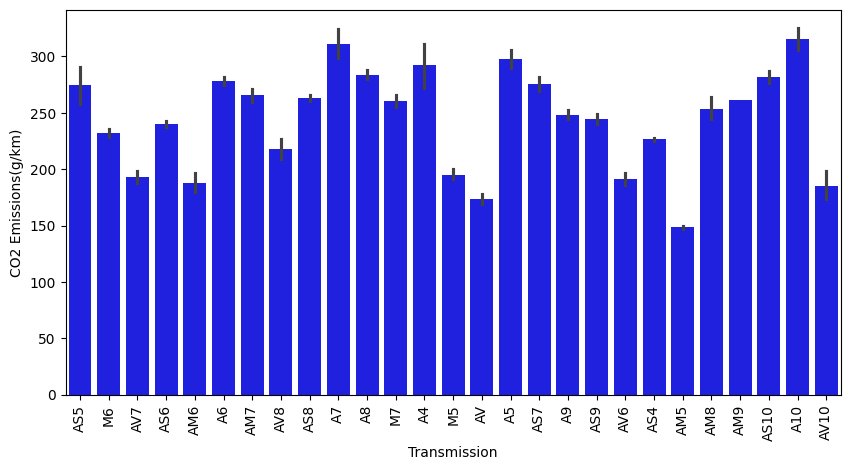

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x='Transmission',y='CO2 Emissions(g/km)',data=df,color='blue')
plt.xticks(rotation=90)

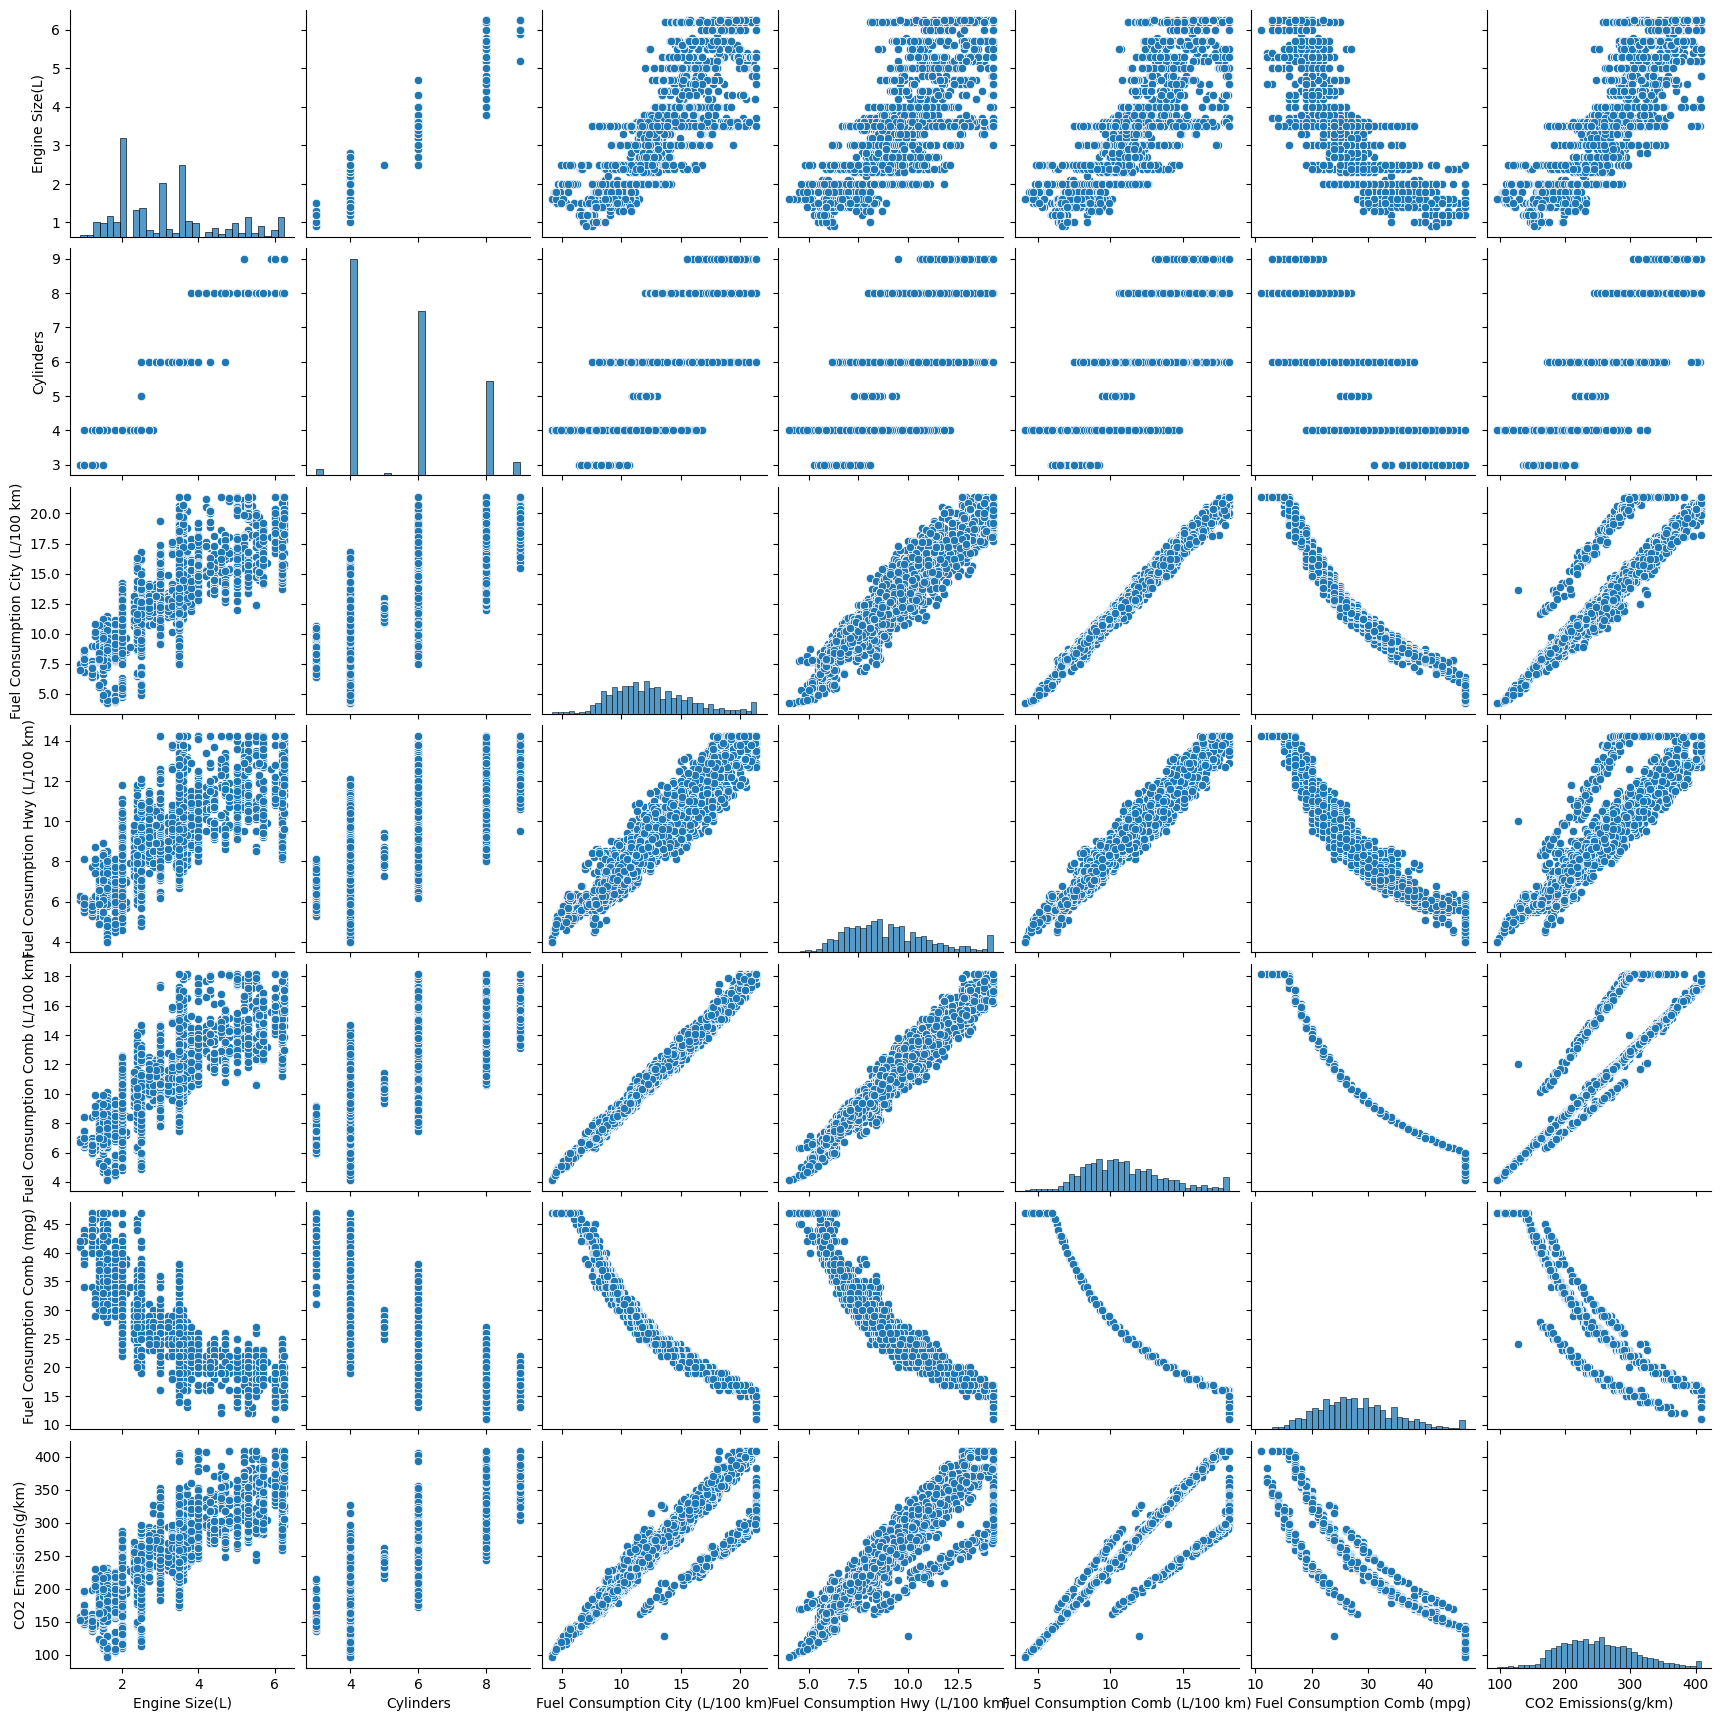

In [59]:
sns.pairplot(df)


<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

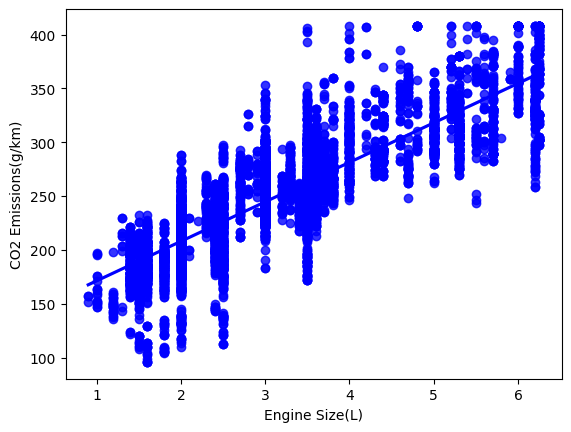

In [60]:
sns.regplot(x='Engine Size(L)', y='CO2 Emissions(g/km)',data=df,color='blue')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'ACURA'),
  Text(1, 0, 'ALFA ROMEO'),
  Text(2, 0, 'ASTON MARTIN'),
  Text(3, 0, 'AUDI'),
  Text(4, 0, 'BENTLEY'),
  Text(5, 0, 'BMW'),
  Text(6, 0, 'BUICK'),
  Text(7, 0, 'CADILLAC'),
  Text(8, 0, 'CHEVROLET'),
  Text(9, 0, 'CHRYSLER'),
  Text(10, 0, 'DODGE'),
  Text(11, 0, 'FIAT'),
  Text(12, 0, 'FORD'),
  Text(13, 0, 'GMC'),
  Text(14, 0, 'HONDA'),
  Text(15, 0, 'HYUNDAI'),
  Text(16, 0, 'INFINITI'),
  Text(17, 0, 'JAGUAR'),
  Text(18, 0, 'JEEP'),
  Text(19, 0, 'KIA'),
  Text(20, 0, 'LAMBORGHINI'),
  Text(21, 0, 'LAND ROVER'),
  Text(22, 0, 'LEXUS'),
  Text(23, 0, 'LINCOLN'),
  Text(24, 0, 'MASERATI'),
  Text(25, 0, 'MAZDA'),
  Text(26, 0, 'MERCEDES-BENZ'),
  Text(27, 0, 'MINI'),
  Text(28, 0, 'MITSUBISHI'),
  Text(29, 0, 'NISSAN')

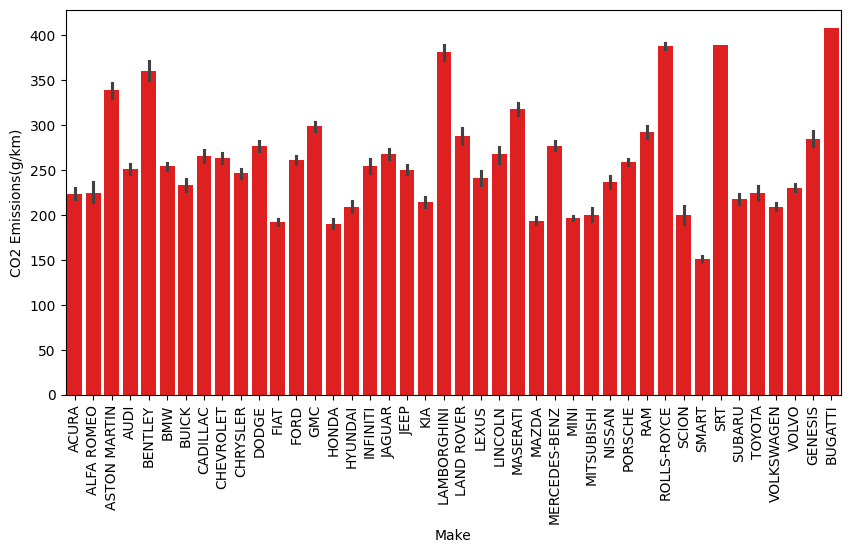

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x='Make',y='CO2 Emissions(g/km)',data=df,color='red')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Z'),
  Text(1, 0, 'D'),
  Text(2, 0, 'X'),
  Text(3, 0, 'E'),
  Text(4, 0, 'N')])

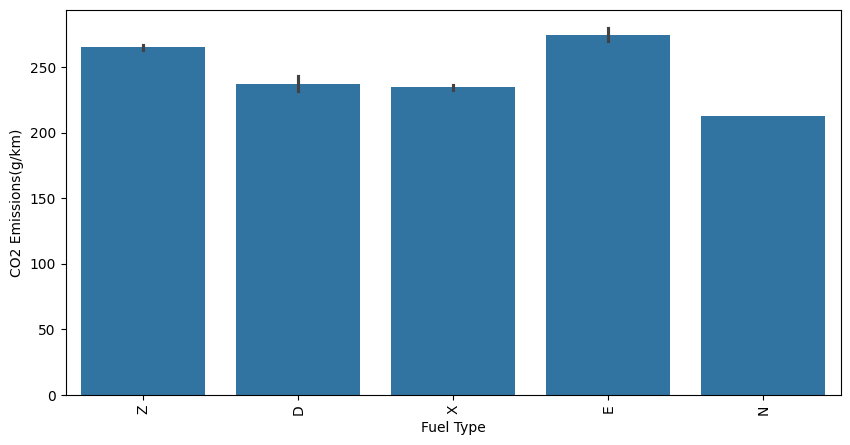

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x='Fuel Type',y='CO2 Emissions(g/km)',data=df)
plt.xticks(rotation=90)

### Summary Statistic

In [63]:
print(df.describe())

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.152844     5.545159                         12.518145   
std          1.335258     1.629445                          3.376879   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          6.250000     9.000000                         21.350000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          8.996994                         10.937360   
std                           2.081056                          2.770957   
min                           4.000000         

### inferential statistic

In [64]:
#Inferential statistics = techniques used to make conclusions about the population using your sample dataset
#Does Engine Size significantly affect CO₂ emissions?
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
print("Correlation between Engine Size and CO₂:", corr)
print(p_value)
if p_value < 0.05:
    print("Engine size significantly affects CO₂ emissions.")
else:
    print("No significant effect found.")


Correlation between Engine Size and CO₂: 0.852405823534214
0.0
Engine size significantly affects CO₂ emissions.


In [65]:
#Do Diesel vehicles have a different mean CO₂ emission than Petrol vehicles?
diseal=df[df['Fuel Type']=='D']['CO2 Emissions(g/km)']
petrol=df[df['Fuel Type']=='Z']['CO2 Emissions(g/km)']
from statsmodels.stats.weightstats import ztest
z_score,p_value=ztest(diseal,petrol)
print(p_value)
print(z_score)
if p_value < 0.05:
    print("Diesel and Petrol vehicles have significantly different mean CO₂ emissions.")
else:
    print("No significant difference between Diesel and Petrol vehicles.")

3.7268630541347093e-11
-6.614548957733452
Diesel and Petrol vehicles have significantly different mean CO₂ emissions.


In [66]:
#Does CO₂ emission differ significantly across different Vehicle Classes?
import scipy.stats as stats
vehicle= df['Vehicle Class'].unique()
group = [df[df['Vehicle Class'] == cls]['CO2 Emissions(g/km)'] 
          for cls in vehicle]
f_stat, p_value = stats.f_oneway(*group)
print(f_stat)
print(p_value)

if p_value < 0.05:
    print("CO₂ emissions differ significantly across Vehicle Classes.")
else:
    print("No significant difference across Vehicle Classes.")


265.9387538549547
0.0
CO₂ emissions differ significantly across Vehicle Classes.


# 3.Featured Engineering

### Encode Categorical Columns

In [97]:
#use one hot encoding when the column contain unique values<50
from sklearn.preprocessing import OneHotEncoder
entry = df[['Make','Vehicle Class','Transmission','Fuel Type']]
encoder = OneHotEncoder(sparse_output=False)   
newcols = encoder.fit_transform(entry)  
new = pd.DataFrame(newcols, columns=encoder.get_feature_names_out(entry.columns))
newdf = pd.concat([df.drop(entry.columns, axis=1), new], axis=1)
print(newdf.head())


        Model  Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0         ILX             2.0          4                               9.9   
1         ILX             2.4          4                              11.2   
2  ILX HYBRID             1.5          4                               6.0   
3     MDX 4WD             3.5          6                              12.7   
4     RDX AWD             3.5          6                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Make_ACURA  \
0                           33 

In [98]:
#use frequency encoding when the column contain unique values>50
freq_model=newdf['Model'].value_counts()
newdf['Model freq']=newdf['Model'].map(freq_model)
newdf=newdf.drop(['Model'],axis=1)

In [69]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()

# df['Fuel Type']=le.fit_transform(df['Fuel Type'])

<Axes: >

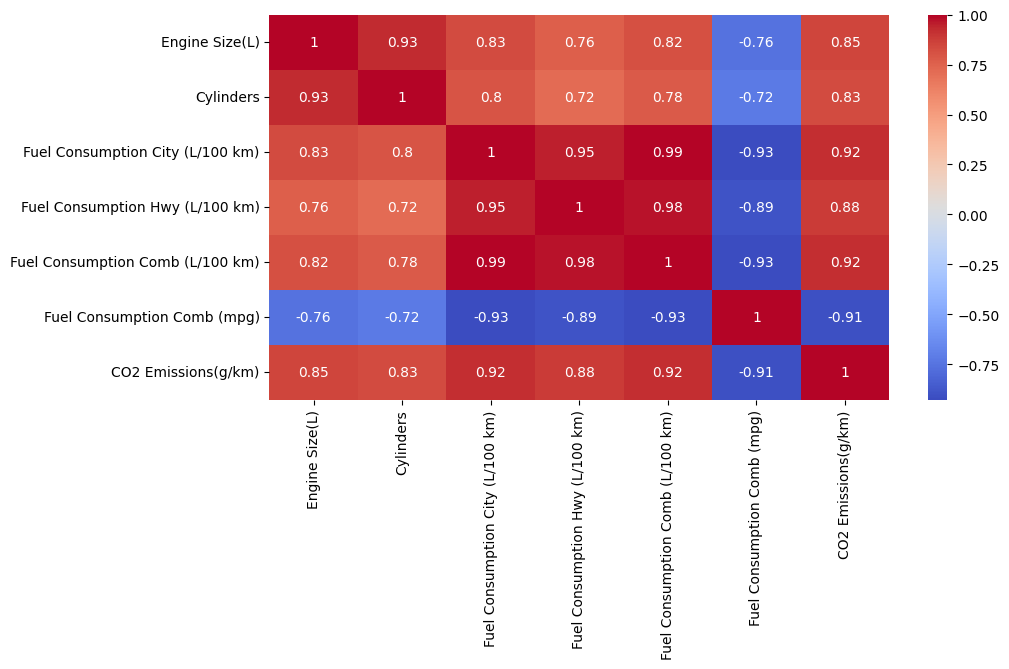

In [99]:
corr=numeric.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [100]:
import pandas as pd
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")

newdf

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Model freq
0,2.0,4,9.9,6.7,8.5,33,196,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9
1,2.4,4,11.2,7.7,9.6,29,221,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,9
2,1.5,4,6.0,5.8,5.9,47,136,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,3.5,6,12.7,9.1,11.1,25,255,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,3.5,6,12.1,8.7,10.6,27,244,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
7381,2.0,4,11.2,8.3,9.9,29,232,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
7382,2.0,4,11.7,8.6,10.3,27,240,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
7383,2.0,4,11.2,8.3,9.9,29,232,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5


In [101]:
pd.set_option('display.max_rows', None)
newdf
corr_with_target = newdf.corr()['CO2 Emissions(g/km)'].sort_values(ascending=False)
print(corr_with_target)


CO2 Emissions(g/km)                       1.000000
Fuel Consumption Comb (L/100 km)          0.927862
Fuel Consumption City (L/100 km)          0.925447
Fuel Consumption Hwy (L/100 km)           0.902474
Engine Size(L)                            0.852406
Cylinders                                 0.840185
Vehicle Class_SUV - STANDARD              0.313680
Vehicle Class_PICKUP TRUCK - STANDARD     0.250029
Fuel Type_Z                               0.232830
Vehicle Class_VAN - PASSENGER             0.222085
Make_ROLLS-ROYCE                          0.198634
Make_GMC                                  0.182133
Make_LAMBORGHINI                          0.169779
Transmission_A6                           0.167767
Transmission_A8                           0.156007
Make_BENTLEY                              0.151706
Make_ASTON MARTIN                         0.123234
Make_MERCEDES-BENZ                        0.113179
Vehicle Class_TWO-SEATER                  0.110263
Make_MASERATI                  

# 4.Feature Selection

In [102]:
x=newdf[['Fuel Consumption Comb (L/100 km)','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Engine Size(L)','Cylinders']]
y=newdf['CO2 Emissions(g/km)']



In [103]:
pd.reset_option('display.max_rows')
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64

### split data

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


### Scale the data

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# 5.Model selection and training

### Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
model=LinearRegression()
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
model.fit(x_train,y_train)
predict=model.predict(x_test)
mse=mean_squared_error(y_test,predict)
r2=r2_score(y_test,predict)
mae=mean_absolute_error(y_test,predict)
print(mse)
print(r2)
print(np.sqrt(mse))
print(mae)

381.80218079351897
0.886298791899044
19.539758974806187
12.275913914459064


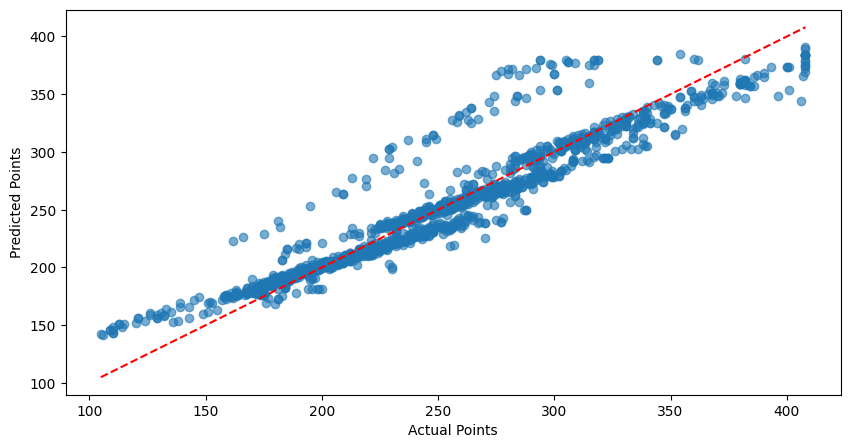

In [108]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,predict,alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

### Polynomial Regression

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
model1=LinearRegression()
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)
model1.fit(x_train_poly,y_train)
predict1=model1.predict(x_test_poly)
mse1=mean_squared_error(y_test,predict1)
r1=r2_score(y_test,predict1)
mae1=mean_absolute_error(y_test,predict1)
print(mae1)
print(mse1)
print(r1)
print(mae1)
print(np.sqrt(mse1))

236.08079196235002
0.9296948194487492
8.715719492384274
15.364920825124678


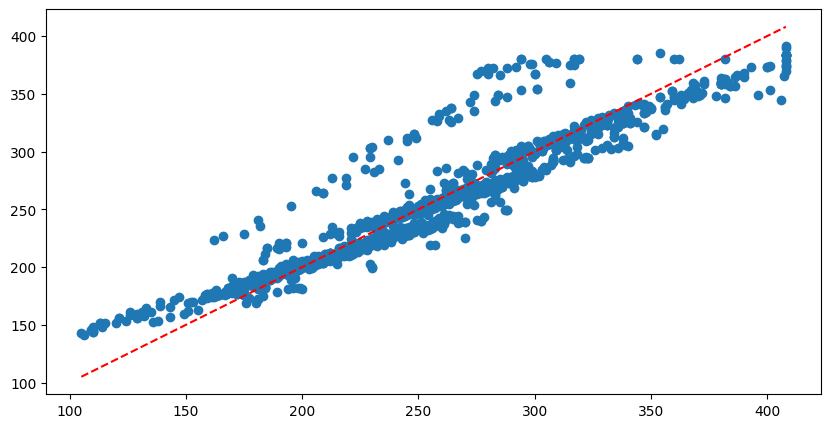

In [112]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,predict)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.show()

### R2_ score increased by 93% and RMSE decreased by 14.8

### KNN Regression

### Hyper parameter tuning

In [115]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
knn=KNeighborsRegressor(n_neighbors=5)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
param={ 'n_neighbors':[5,10,15],
        'metric':['euclidean','manhattan']
      }
grid=GridSearchCV(knn,param,cv=5)
grid.fit(x_train,y_train)
predict3=grid.predict(x_test)
mse3=mean_squared_error(y_test,predict3)
r2=r2_score(y_test,predict3)
mae2=mean_absolute_error(y_test,predict3)

print(mse3)
print(r2)
print(np.sqrt(mse3))
print(mae2)
print(grid.best_params_)

78.47306702775896
0.9766306140370926
8.858502527389094
3.793635748138117
{'metric': 'euclidean', 'n_neighbors': 5}


### r2 score increased by 97% and RMSE decreased by 8.6

### Support Vector Machine

In [116]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
svr.fit(x_train,y_train)
predict5=svr.predict(x_test)
mse5=mean_squared_error(y_test,predict5)
r5=r2_score(y_test,predict5)
print(mse5)
print(r5)
print(np.sqrt(mse5))
mae3=mean_absolute_error(y_test,predict5)
print(mae3)

283.17713155844933
0.9156694655388266
16.827867706826357
7.603566220584178


### Decision tree

### Hyper parameter tuning

In [117]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import GridSearchCV
dtr=DecisionTreeRegressor(criterion='squared_error')
param={ "criterion": ["squared_error", "friedman_mse", "absolute_error"],
        "max_depth": [3, 5, 7, 9, 12] }

grid2=GridSearchCV(dtr,param,cv=5,scoring='r2')

grid2.fit(x_train,y_train)
predict4=grid2.predict(x_test)
mse4=mean_squared_error(y_test,predict4)
r3=r2_score(y_test,predict4)
print(mse4)
print(r3)
print(np.sqrt(mse4))
print(grid2.best_params_)
mae5=mean_absolute_error(y_test,predict4)
print(mae5)

121.18824771724579
0.9639099752011614
11.008553388944698
{'criterion': 'friedman_mse', 'max_depth': 12}
3.3720711061616275


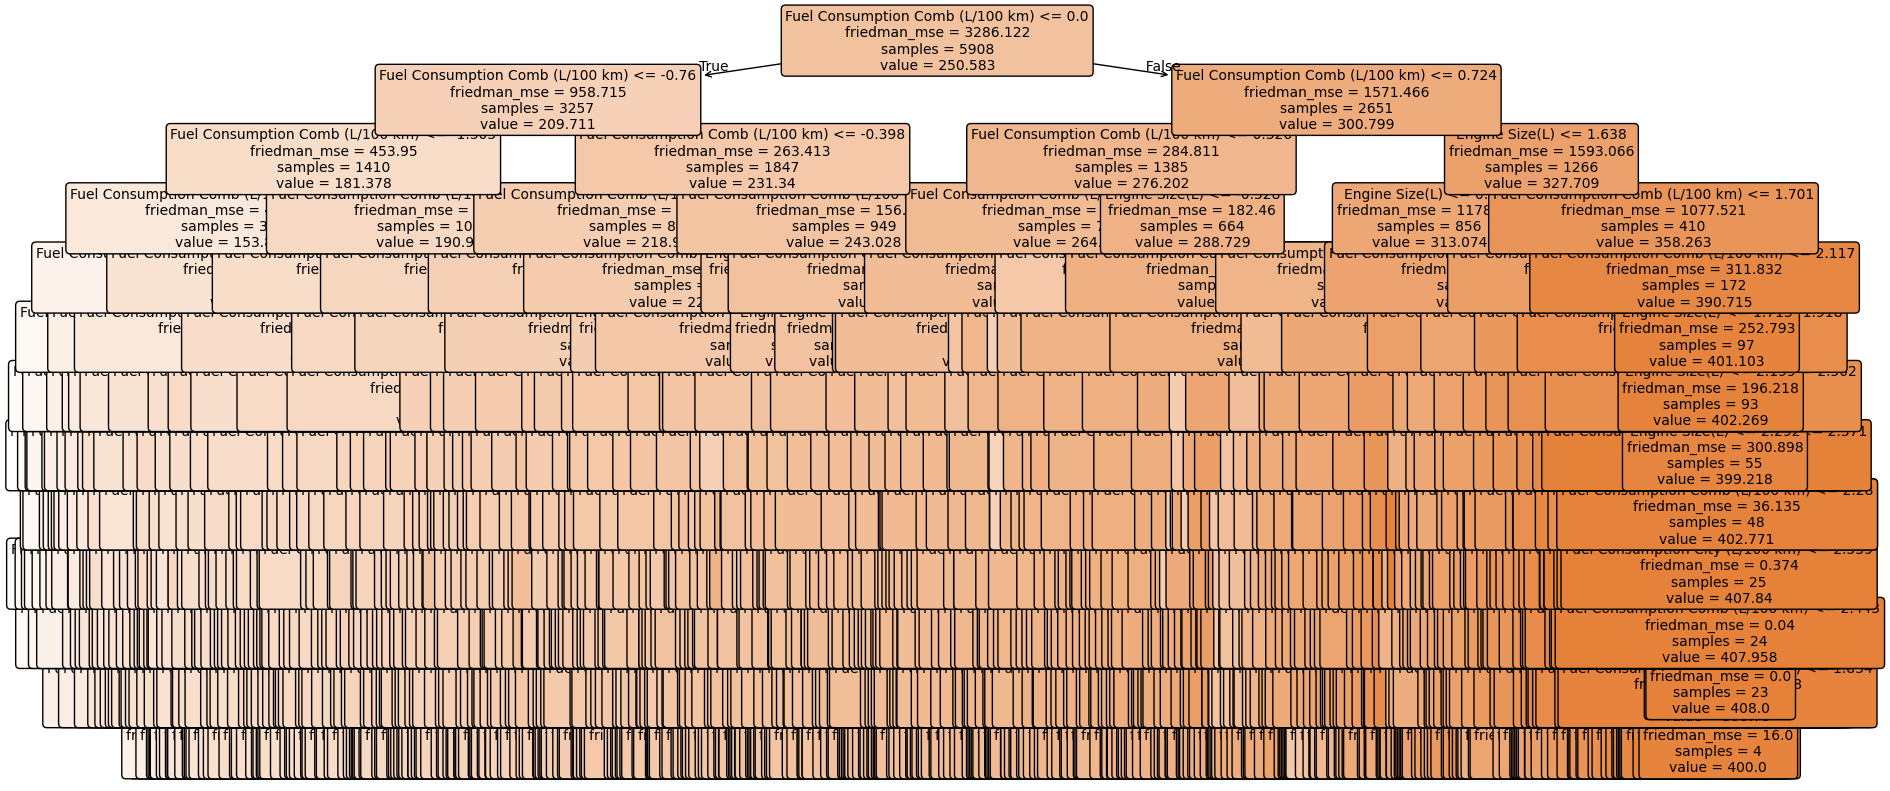

In [118]:
best_tree = grid2.best_estimator_

plt.figure(figsize=(20,10))
plot_tree(
    best_tree,
    feature_names=x.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

### Random Forest

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
param = {
    "n_estimators": [150, 200],
    "criterion": ["squared_error", "absolute_error"],
    "max_depth": [5, 10],
   
}
grid3 = GridSearchCV(
    estimator=rf,
    param_grid=param,
    scoring="r2",
    cv=5,
    
)
grid3.fit(x_train, y_train)
print(grid3.best_params_)
predict_best = grid3.predict(x_test)
mse5 = mean_squared_error(y_test, predict_best)
r5 = r2_score(y_test, predict_best)

print(r5)
print(mse5)
print(np.sqrt(mse5))
mae6=mean_absolute_error(y_test,predict_best)
print(mae6)


{'criterion': 'squared_error', 'max_depth': 10, 'n_estimators': 150}
0.9748498029864986
84.45292910709846
9.18982747972444
3.598607364668561


### Model Performance Comparison

| Model               | R² Score | RMSE  |
|---------------------|----------|-------|
| Linear Regression   | 0.88     | 19.5  |
| Polynomial          | 0.93     | 15.3  |
| KNN                 | 0.97     | 8.8   |
| SVM                 | 0.91     | 16.82 |
| Decision Tree       | 0.96     | 11    |
| Random Forest       | 0.97     | 9.1   |



### The Random Forest model demonstrated the most reliable and accurate 97%  performance for predicting CO₂ emissions. Due to its strong generalization ability, low error rates, and robustness after hyperparameter tuning, it was selected as the final model for this project

### Predict input

In [124]:
def predict_co2():
    fc_comb = float(input("Fuel Consumption Combine (L/100 km): "))
    fc_city = float(input("Fuel Consumption City (L/100 km): "))
    fc_hwy  = float(input("Fuel Consumption Hwy (L/100 km): "))
    engine  = float(input("Engine Size (L): "))
    cyl     = int(input("Cylinders: "))

    data = np.array([[fc_comb, fc_city, fc_hwy, engine, cyl]])

    result = grid3.predict(data)
    print("\nPredicted CO₂ Emission:", result[0]-150)

predict_co2()


Fuel Consumption Combine (L/100 km):  8.5
Fuel Consumption City (L/100 km):  9.9
Fuel Consumption Hwy (L/100 km):  7
Engine Size (L):  2
Cylinders:  4



Predicted CO₂ Emission: 257.35152714784016
